In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Апроксимація функції 1 змінної

In [40]:
layers = [
    [1, ''],
    [100, 'tanh'],
    [100, 'tanh'],
    [1, 'linear']]
epochs = 1000
target_function = lambda x: -np.sin(3*x)

In [41]:
# Generate training data.
batch_size = 1000
x_train = np.linspace(-1, 7, num=batch_size).reshape(-1,1)

# Generate the evaluation data. 
# (exceeds the range of the training data to evaluate the prediction capabilities)
x_eval = np.linspace(-3, 10, num=batch_size).reshape(-1,1)

In [42]:
# Generate labels for training data (here: the image of the selected function applied to X_train)
y_train = target_function(x_train)
# Scale the train data (x), the evaluation data (x_eval) and the labels (y) to the range [-1, 1].
x_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
x_scaled = x_scaler.fit_transform(x_train)
y_scaled = y_scaler.fit_transform(y_train)
x_eval_scaled = x_scaler.transform(x_eval)

# Build and apply multilayer perceptron.
model = keras.Sequential()
# change activation function between 'tanh' and 'relu' to see different effects
model.add(keras.layers.Input(shape=(layers[0][0],)))
for i in range(1, len(layers)):
    model.add(keras.layers.Dense(layers[i][0], kernel_initializer='he_normal', activation=layers[i][1]))
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))
model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse'])
model.fit(x_scaled, y_scaled, epochs=epochs, batch_size=np.size(x_scaled), verbose=0)
result = model.predict(x_eval_scaled, batch_size=np.size(x_eval_scaled))

# Rescale the result to original range.
predictions = y_scaler.inverse_transform(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


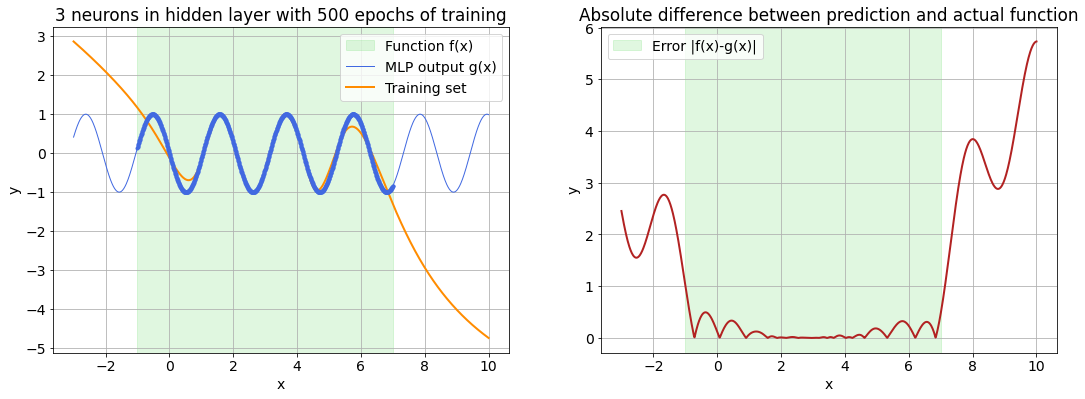

In [43]:
fig = plt.figure(1, figsize=(18,6))
ax = fig.add_subplot(1, 2, 1)
ax.axvspan(x_train.flatten()[0], x_train.flatten()[-1], alpha=0.15, color='limegreen')
plt.plot(x_eval, target_function(x_eval), '-', color='royalblue', linewidth=1.0)
plt.plot(x_eval, predictions, '-', label='output', color='darkorange', linewidth=2.0)
plt.plot(x_train, target_function(x_train), '.', color='royalblue')
plt.grid(which='both');
plt.rcParams.update({'font.size': 14})
plt.xlabel('x');
plt.ylabel('y')
plt.title('%d neurons in hidden layer with %d epochs of training' % (units ,epochs))
plt.legend(['Function f(x)', 'MLP output g(x)', 'Training set'])
ax = fig.add_subplot(1, 2, 2)
ax.axvspan(x_train.flatten()[0], x_train.flatten()[-1], alpha=0.15, color='limegreen')
plt.plot(x_eval, np.abs(predictions-target_function(x_eval)), '-', label='output', color='firebrick', linewidth=2.0)
plt.grid(which='both');
plt.xlabel('x');
plt.ylabel('y')
plt.title('Absolute difference between prediction and actual function')
plt.legend(['Error |f(x)-g(x)|'])
#plt.savefig('KerasMLP_%d_neurons.pdf' % units, bbox_inches='tight')
plt.show()

# Аппроксимація функції 2 змінних

In [47]:
target_2dfunction = lambda x1, x2: np.power(x1,2)+np.power(x2,2)

batch_size = 16 # Number of grid steps per dimension (batch_size**2 equals number of training samples).
x1 = np.linspace(-3.0, 3.0, num=batch_size).reshape(-1,1)
x2 = np.linspace(-3.0, 3.0, num=batch_size).reshape(-1,1)

units = 10
epochs = 1000
X1, X2 = np.meshgrid(x1, x2)
# Generate labels.
Y = target_2dfunction(X1, X2).reshape(-1,1)
# Scale X1 and X2 values to the range [-1, 1]. 
x1_scaler = MinMaxScaler(feature_range=(-1, 1))
x2_scaler = MinMaxScaler(feature_range=(-1, 1))
y_scaler = MinMaxScaler(feature_range=(-1, 1))
x1_scaled = x1_scaler.fit_transform(x1)
x2_scaled = x2_scaler.fit_transform(x2)
y_scaled = y_scaler.fit_transform(Y)
X1_scaled, X2_scaled = np.meshgrid(x1_scaled, x2_scaled)
train_data = np.stack((X1_scaled, X2_scaled), axis=-1).reshape(batch_size**2, 2)
# Build the model.
model = keras.Sequential()
# change activation function between 'tanh' and 'relu' to see different effects
model.add(keras.layers.Dense(units, input_dim=train_data.shape[1], kernel_initializer='he_normal', activation=activation_function))
model.add(keras.layers.Dense(1, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
# Train the model.
model.fit(train_data, y_scaled, epochs=epochs, batch_size=np.size(train_data), verbose=0)
# Calculate the prediction.
result = model.predict(train_data, batch_size=np.size(train_data))
# Rescale data to original range.
res_rescaled = y_scaler.inverse_transform(result)
res = res_rescaled.reshape(batch_size, batch_size)
X1,X2 = np.meshgrid(x1,x2)
Y = target_2dfunction(X1,X2)

/home/wsluser/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Text(0.5, 1.0, 'Absolute difference between \n prediction and actual function')

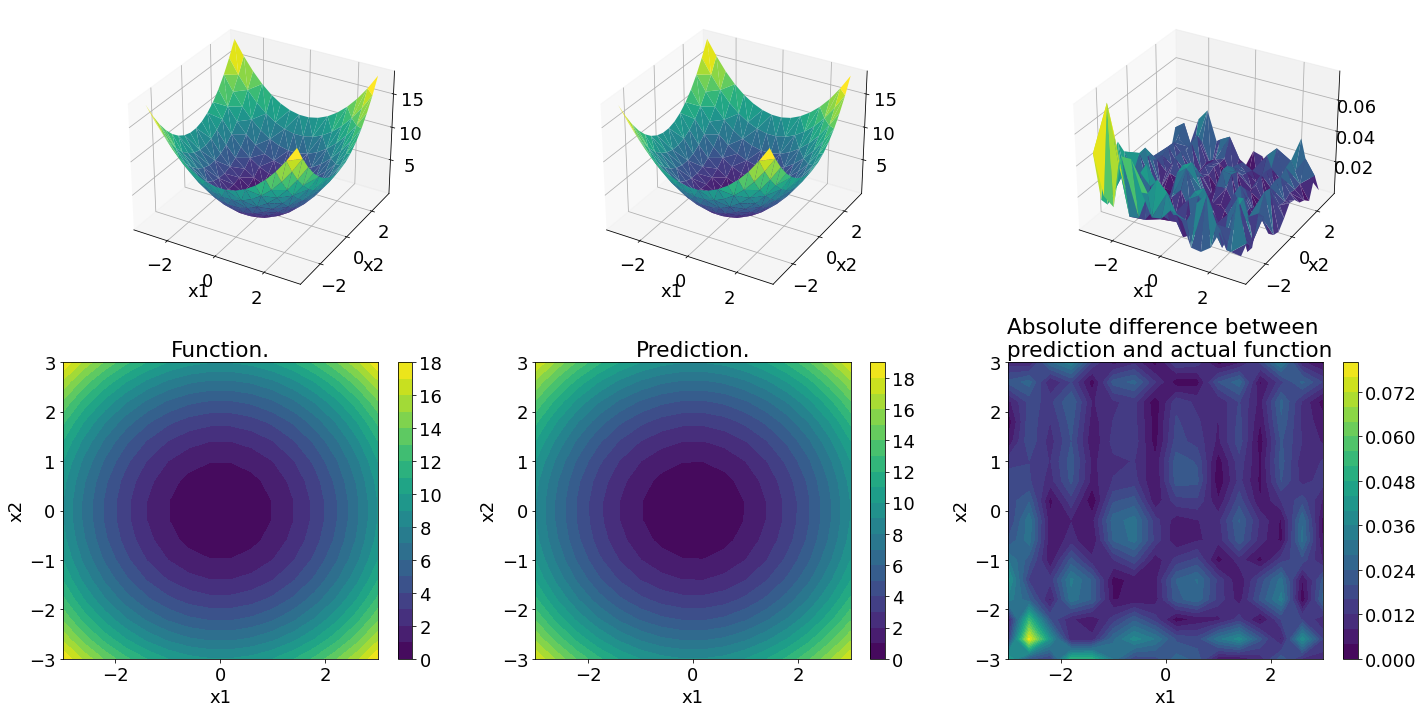

In [48]:
fig = plt.figure(1,figsize=(24,12))
plt.rcParams.update({'font.size': 18})
ax = fig.add_subplot(2, 3, 1, projection='3d')
im = ax.plot_trisurf(X1.flatten(), X2.flatten(), Y.flatten(), cmap='viridis', linewidth=0.2, antialiased=True)
plt.xlabel('x1');
plt.ylabel('x2');
ax = fig.add_subplot(2, 3, 4)
im = ax.contourf(X1, X2, Y, levels=20)
plt.xlabel('x1');
plt.ylabel('x2');
fig.colorbar(im)
plt.title('Function.')
ax = fig.add_subplot(2,3, 2, projection='3d')
im = ax.plot_trisurf(X1.flatten(), X2.flatten(), res.flatten(), cmap='viridis', linewidth=0.2, antialiased=True)
plt.xlabel('x1');
plt.ylabel('x2');
ax = fig.add_subplot(2, 3, 5)
im = ax.contourf(X1, X2, res, levels=20)
plt.xlabel('x1');
plt.ylabel('x2');
fig.colorbar(im)
plt.title('Prediction.')
ax = fig.add_subplot(2,3, 3, projection='3d')
im = ax.plot_trisurf(X1.flatten(), X2.flatten(), np.abs(res-Y).flatten(), cmap='viridis', linewidth=0.2, antialiased=True)
plt.xlabel('x1');
plt.ylabel('x2');
ax = fig.add_subplot(2, 3, 6)
im = ax.contourf(X1, X2, np.abs(res-Y), levels=20)
plt.xlabel('x1');
plt.ylabel('x2');
fig.colorbar(im)
plt.title('Absolute difference between \n prediction and actual function')
#plt.savefig('2d_fun%d_units%d.pdf' % (fun_2d, units),bbox_inches='tight')